<a href="https://colab.research.google.com/github/Estebanarci2/Marketing-analitica3/blob/main/B)EXPLORATORIO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go ### para gráficos
import plotly.express as px
import sqlite3 as sql
#import sklearn.prepocessing
import joblib
from ipywidgets import interact   ## analisis interactivo
import matplotlib.pyplot as plt
#from sklearn import neighborns ## basado en contenido un solo
from datetime import datetime

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
## conectar la base de datos

conn = sql.connect ("/content/drive/MyDrive/analitica3/marketing /db_movies")
cur=conn.cursor()

In [42]:
# consultar bases de datos que se pueden consultar por medio de sql
cur.execute("Select name from sqlite_master where type='table'")
cur.fetchall()

[('ratings',),
 ('movies',),
 ('usuarios_sel',),
 ('usuarios_fil',),
 ('movies_sel',),
 ('movies_fil',),
 ('ratings_final',),
 ('movies_final',),
 ('full_ratings',)]

In [43]:
pd.read_sql_query(""" SELECT * FROM movies_final """,conn)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller
...,...,...,...
1292,148626,"Big Short, The (2015)",Drama
1293,152081,Zootopia (2016),Action|Adventure|Animation|Children|Comedy
1294,164179,Arrival (2016),Sci-Fi
1295,166528,Rogue One: A Star Wars Story (2016),Action|Adventure|Fantasy|Sci-Fi


In [44]:
pd.read_sql_query(""" SELECT * FROM full_ratings """,conn)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
46245,609,589,3.0,847220990,Terminator 2: Judgment Day (1991),Action|Sci-Fi
46246,609,590,4.0,847220802,Dances with Wolves (1990),Adventure|Drama|Western
46247,609,592,3.0,847220802,Batman (1989),Action|Crime|Thriller
46248,609,786,3.0,847221025,Eraser (1996),Action|Drama|Thriller


In [45]:
### verificar cuantas calificaciones hay por peliculas
conteo_ratings=pd.read_sql_query("""SELECT rating, COUNT(*)AS count
              FROM  ratings
              GROUP BY rating
               """, conn)
conteo_ratings


,rating,count
0,0.5,1370
1,1.0,2811
2,1.5,1791
3,2.0,7551
4,2.5,5550
5,3.0,20047
6,3.5,13136
7,4.0,26818
8,4.5,8551
9,5.0,13211


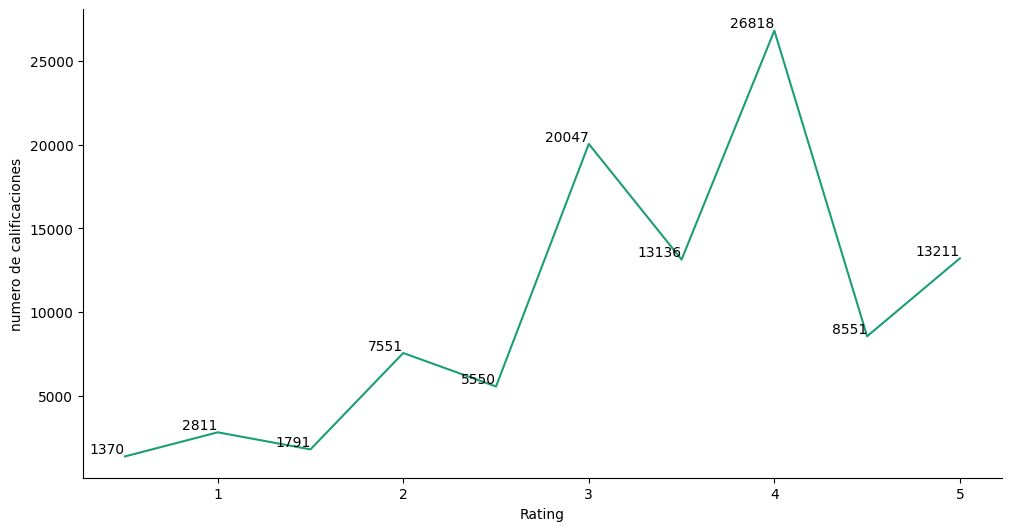

In [46]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['rating']
  ys = series['count']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])
  for x, y in zip(xs, ys):
        plt.text(x, y, str(y), ha='right', va='bottom')


fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = conteo_ratings.sort_values('rating', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Rating')
_ = plt.ylabel('numero de calificaciones')

### Analizando la siguiete grafica, se evidecia que 26818 peliculas obtuvieros una calificacion de 4

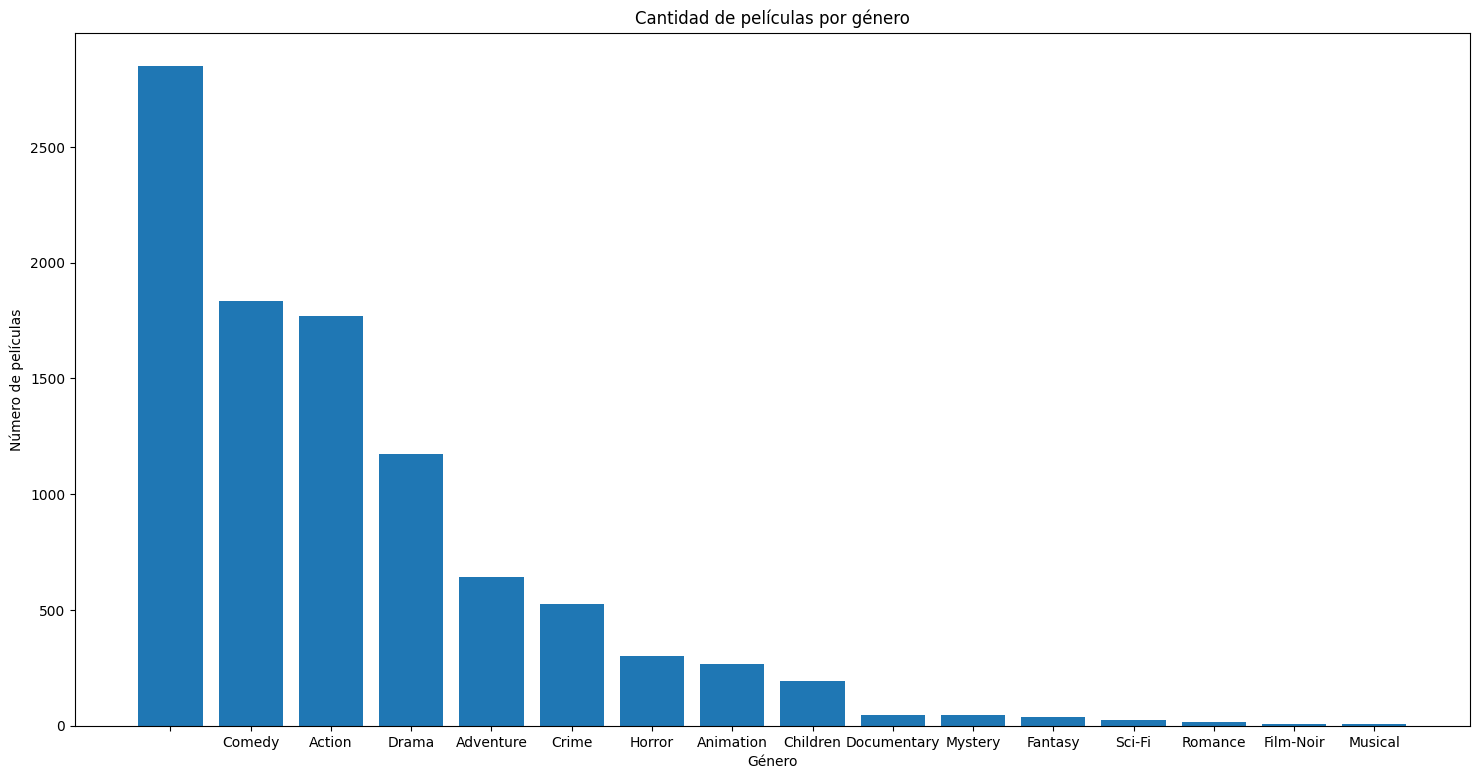

In [47]:
cur.execute("""
     SELECT SUBSTR(genres, 1, INSTR(genres, '|') - 1) AS genero, COUNT(*) AS total_peliculas
     FROM movies
     GROUP BY genero
     ORDER BY total_peliculas DESC
""")
gen = cur.fetchall()

# Crear el gráfico de barras
x = [row[0] for row in gen]
y = [row[1] for row in gen]
plt.figure(figsize=(18,9))
plt.bar(x, y)
plt.xlabel('Género')
plt.ylabel('Número de películas')
plt.title('Cantidad de películas por género')
plt.show()

In [48]:
generos = pd.read_sql_query("""
     SELECT SUBSTR(genres, 1, INSTR(genres, '|') - 1) AS genero, COUNT(*) AS total_peliculas
     FROM movies
     GROUP BY genero
     ORDER BY total_peliculas DESC
""", conn)
generos.head()

,genero,total_peliculas
0,,2851
1,Comedy,1833
2,Action,1768
3,Drama,1173
4,Adventure,641


In [49]:
pd.read_sql_query(""" SELECT * FROM ratings """,conn)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [50]:
## serie de tiempo de numero de visulizacion de peliculas por mes.
def datefromtimestamp(timestamp):
    date = datetime.utcfromtimestamp(timestamp).strftime('%m-%d-%Y')
    return date

In [51]:
ratings=pd.read_sql_query("""SELECT * FROM ratings""",conn
                         )
ratings["timestamp"] = ratings["timestamp"].apply(lambda x: datefromtimestamp(x))
ratings["timestamp"] = pd.to_datetime(ratings["timestamp"])

In [52]:
## Serie de tiempo de los meses en que más se ven peliculas ### si da, sino que toca correr de nuevo la función de la fecha,
##creo que la de los años la daña
import plotly.express as px
ratings["timestamp"] = ratings["timestamp"].dt.month
cambio_fecha= ratings.groupby(["timestamp"])[["userId"]].count().reset_index()
fig = px.line(cambio_fecha, x='timestamp', y =['userId'], title = '<b>Vistas de películas mensuales<b>',
              color_discrete_sequence=px.colors.qualitative.G10)
fig.update_layout(
    template = 'simple_white',
    title_x = 0.5,
   legend_title = 'Usuarios',
    xaxis_title = '<b>Mes<b>',
    yaxis_title = '<b>Cantidad de usuarios<b>',
)
fig.show()

al observar la serie de tiempo , se evidenica que el mes de mayo es en que los usuarios tienen mayor visualizaciones


In [53]:
## ¿Cuáles son las 20 películas que han recibido las calificaciones promedio más altas por parte de los usuarios y sus respetivos nombres?

pd.read_sql_query("""SELECT movieID, AVG(rating) AS promedio_rating, title
              FROM  full_ratings
              GROUP BY movieID
              ORDER BY promedio_rating DESC""", conn).head(20)

## se puede observar que las 20 peliculas que obtuvieron mejores calificaciones fueron creadas entre el año 1940 y 2007.

,movieId,promedio_rating,title
0,1104,4.615385,"Streetcar Named Desire, A (1951)"
1,1235,4.531250,Harold and Maude (1971)
2,922,4.529412,Sunset Blvd. (a.k.a. Sunset Boulevard) (1950)
3,3100,4.500000,"River Runs Through It, A (1992)"
4,246,4.458333,Hoop Dreams (1994)
5,318,4.439716,"Shawshank Redemption, The (1994)"
6,1228,4.437500,Raging Bull (1980)
7,930,4.416667,Notorious (1946)
8,1267,4.409091,"Manchurian Candidate, The (1962)"
9,1204,4.403226,Lawrence of Arabia (1962)


In [55]:
#pd.read_sql_query(""" SELECT year, count(movieId) as cantidad
#FROM year
#GROUP BY year
#ORDER BY cantidad DESC

#""",conn ).head()


In [ ]:
ano.tail()